## Wheelchair propulsion stroke detection
1. Load the dataset 
2. Convert target column to binary value where 'SC'=1 and'A'=0
3. Data analysis for classifcation task.
   a. Missing Values
   b. Numeric Distributions (Plot histograms and scatterplot w.r.t target) 
   c. Create boxplot of each feature
3. Split the dataset into train and test datasets
4. Feature selection using LASSO
5. Model building and selecting the model with highest evaluation metric
6. Hyperparameter tuning
7. Save the finalized model

In [81]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta 
from time import gmtime, strftime
from sklearn.model_selection import train_test_split
from scipy import stats
import scipy.signal
from scipy import signal
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from ydata_profiling import ProfileReport
%matplotlib inline

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression, Ridge,Lasso

#For hyperparameter tuning
from sklearn.model_selection import GridSearchCV
#from skopt import BayesSearchCV
from sklearn.svm import SVC
#from xgboost import XGBRegressor
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import TransformedTargetRegressor
from sklearn.preprocessing import QuantileTransformer

import joblib
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import anderson
from scipy import stats
from sklearn import preprocessing

#### Data ingestion 

In [24]:
df=pd.read_csv('R:/veerua01lab/veerua01labspace/Neha Ingale/Wheelchair propulsion/Data/W01_W02_W03_10_5.csv')

In [25]:
len(df.columns)

29

In [26]:
df=df.drop('Unnamed: 0', axis=1)

In [27]:
pd.pandas.set_option('display.max_columns',None)
df.shape

(126, 28)

In [28]:
df.head()

,X_mean,Y_mean,Z_mean,res_mean,X_std,Y_std,Z_std,result_std,num_crossing_mean_X,num_crossing_mean_Y,num_crossing_mean_Z,num_crossing_mean_plus_std_X,num_crossing_mean_plus_std_Y,num_crossing_mean_plus_std_Z,num_crossing_mean_plus_two_std_X,num_crossing_mean_plus_two_std_Y,num_crossing_mean_plus_two_std_Z,max_psd_X,max_psd_Y,max_psd_Z,peaks_Z_axis,peaks_Y_axis,amp_diff_X_axis,amp_diff_Y_axis,amp_diff_Z_axis,average_push_counts,peaks_X_axis,label
0,0.974383,0.335560,0.114200,1.193580,0.472191,0.449004,0.340559,0.437013,272,283,299,62,74,62,15,31,13,6.076398,7.443558,2.411925,17,23,9.0,0.196813,0.302500,0.276375,12,SC
1,0.922628,0.369313,0.130773,1.192011,0.554748,0.441231,0.381682,0.481620,327,243,285,61,86,70,16,32,16,3.920414,7.193181,4.892364,16,20,9.0,0.280467,0.274684,0.288375,11,SC
2,0.852270,0.396550,0.079905,1.186884,0.556890,0.523691,0.400307,0.475323,366,246,284,66,82,66,6,19,22,14.622677,3.807522,3.802753,16,13,11.0,0.216133,0.516417,0.250100,8,SC
3,0.629290,0.405387,0.194643,1.190402,0.768472,0.484309,0.459111,0.465898,359,314,257,83,76,86,15,13,24,14.241934,5.801580,4.988526,26,24,25.0,0.269080,0.227783,0.248542,12,SC
4,0.977205,0.346010,0.185072,1.228273,0.460446,0.462799,0.437036,0.466307,224,285,343,66,85,64,28,23,20,6.156752,9.172462,4.571564,32,23,19.0,0.398323,0.241682,0.328889,12,SC


**Target column is a categorical variable
Convert Target column (categorical variable) to binary values where 'SC'= 1 and 'A' = 0**

In [29]:
labels=pd.DataFrame(df['label'])
labels.label[labels.label=='SC']=1
labels.label[labels.label=='A']=0

In [30]:
df['label']=labels.apply(pd.to_numeric)

#### Data analysis
#### a.  Missing Values

In [33]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

if any(df[features_with_na].isnull().any()):
    for feature in features_with_na:
        print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')
else:
    print("No missing values in the selected features.")

No missing values in the selected features.


In [34]:
df.nunique()

X_mean                              126
Y_mean                              126
Z_mean                              126
res_mean                            126
X_std                               126
Y_std                               126
Z_std                               126
result_std                          126
num_crossing_mean_X                  87
num_crossing_mean_Y                  72
num_crossing_mean_Z                  78
num_crossing_mean_plus_std_X         57
num_crossing_mean_plus_std_Y         50
num_crossing_mean_plus_std_Z         57
num_crossing_mean_plus_two_std_X     34
num_crossing_mean_plus_two_std_Y     32
num_crossing_mean_plus_two_std_Z     32
max_psd_X                           126
max_psd_Y                           126
max_psd_Z                           126
peaks_Z_axis                         32
peaks_Y_axis                         24
amp_diff_X_axis                      57
amp_diff_Y_axis                     124
amp_diff_Z_axis                     125


#### b. Plot variables individually w.r.t target

In [36]:
X=df[['X_mean', 'Y_mean', 'Z_mean', 'res_mean', 'X_std', 'Y_std', 'Z_std',
       'result_std', 'num_crossing_mean_X', 'num_crossing_mean_Y',
       'num_crossing_mean_Z', 'num_crossing_mean_plus_std_X',
       'num_crossing_mean_plus_std_Y', 'num_crossing_mean_plus_std_Z',
       'num_crossing_mean_plus_two_std_X', 'num_crossing_mean_plus_two_std_Y',
       'num_crossing_mean_plus_two_std_Z', 'max_psd_X', 'max_psd_Y',
       'max_psd_Z', 'peaks_Z_axis', 'peaks_Y_axis', 'amp_diff_X_axis',
       'amp_diff_Y_axis', 'amp_diff_Z_axis', 'average_push_counts',
       'peaks_X_axis']]
y=df[['label']]

In [37]:
len(X.columns)

27

In [38]:
y.shape

(126, 1)

array([[<Axes: title={'center': 'X_mean'}>,
        <Axes: title={'center': 'Y_mean'}>,
        <Axes: title={'center': 'Z_mean'}>,
        <Axes: title={'center': 'res_mean'}>,
        <Axes: title={'center': 'X_std'}>,
        <Axes: title={'center': 'Y_std'}>,
        <Axes: title={'center': 'Z_std'}>,
        <Axes: title={'center': 'result_std'}>,
        <Axes: title={'center': 'num_crossing_mean_X'}>],
       [<Axes: title={'center': 'num_crossing_mean_Y'}>,
        <Axes: title={'center': 'num_crossing_mean_Z'}>,
        <Axes: title={'center': 'num_crossing_mean_plus_std_X'}>,
        <Axes: title={'center': 'num_crossing_mean_plus_std_Y'}>,
        <Axes: title={'center': 'num_crossing_mean_plus_std_Z'}>,
        <Axes: title={'center': 'num_crossing_mean_plus_two_std_X'}>,
        <Axes: title={'center': 'num_crossing_mean_plus_two_std_Y'}>,
        <Axes: title={'center': 'num_crossing_mean_plus_two_std_Z'}>,
        <Axes: title={'center': 'max_psd_X'}>],
       [<Axes: ti

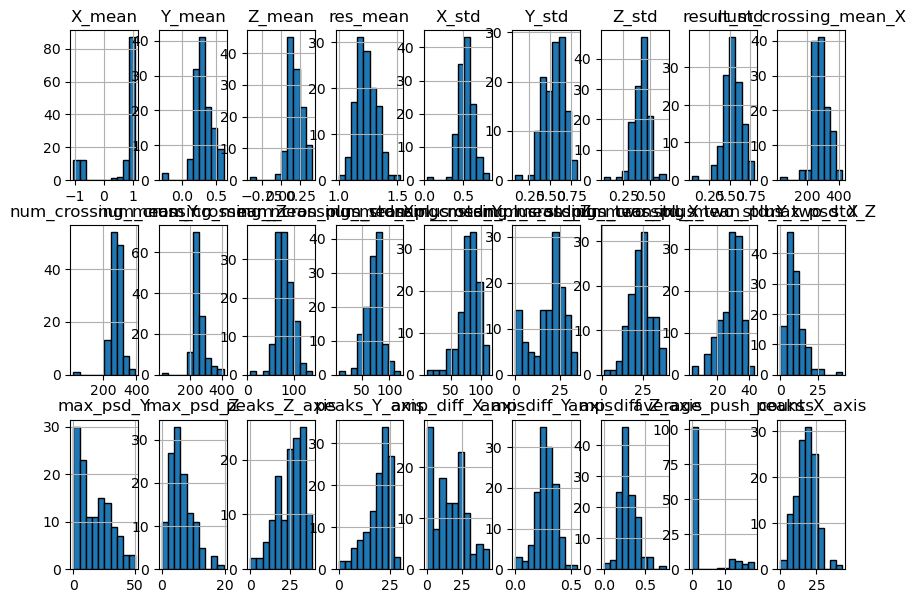

In [40]:
##Plot histograms of variables
#define format for subplots
fig, axis = plt.subplots(3, 9, figsize=(10,7))

#create histogram for each column in DataFrame
X.hist(ax=axis, edgecolor='black', grid=True)

#### c. Create boxplot for each feature

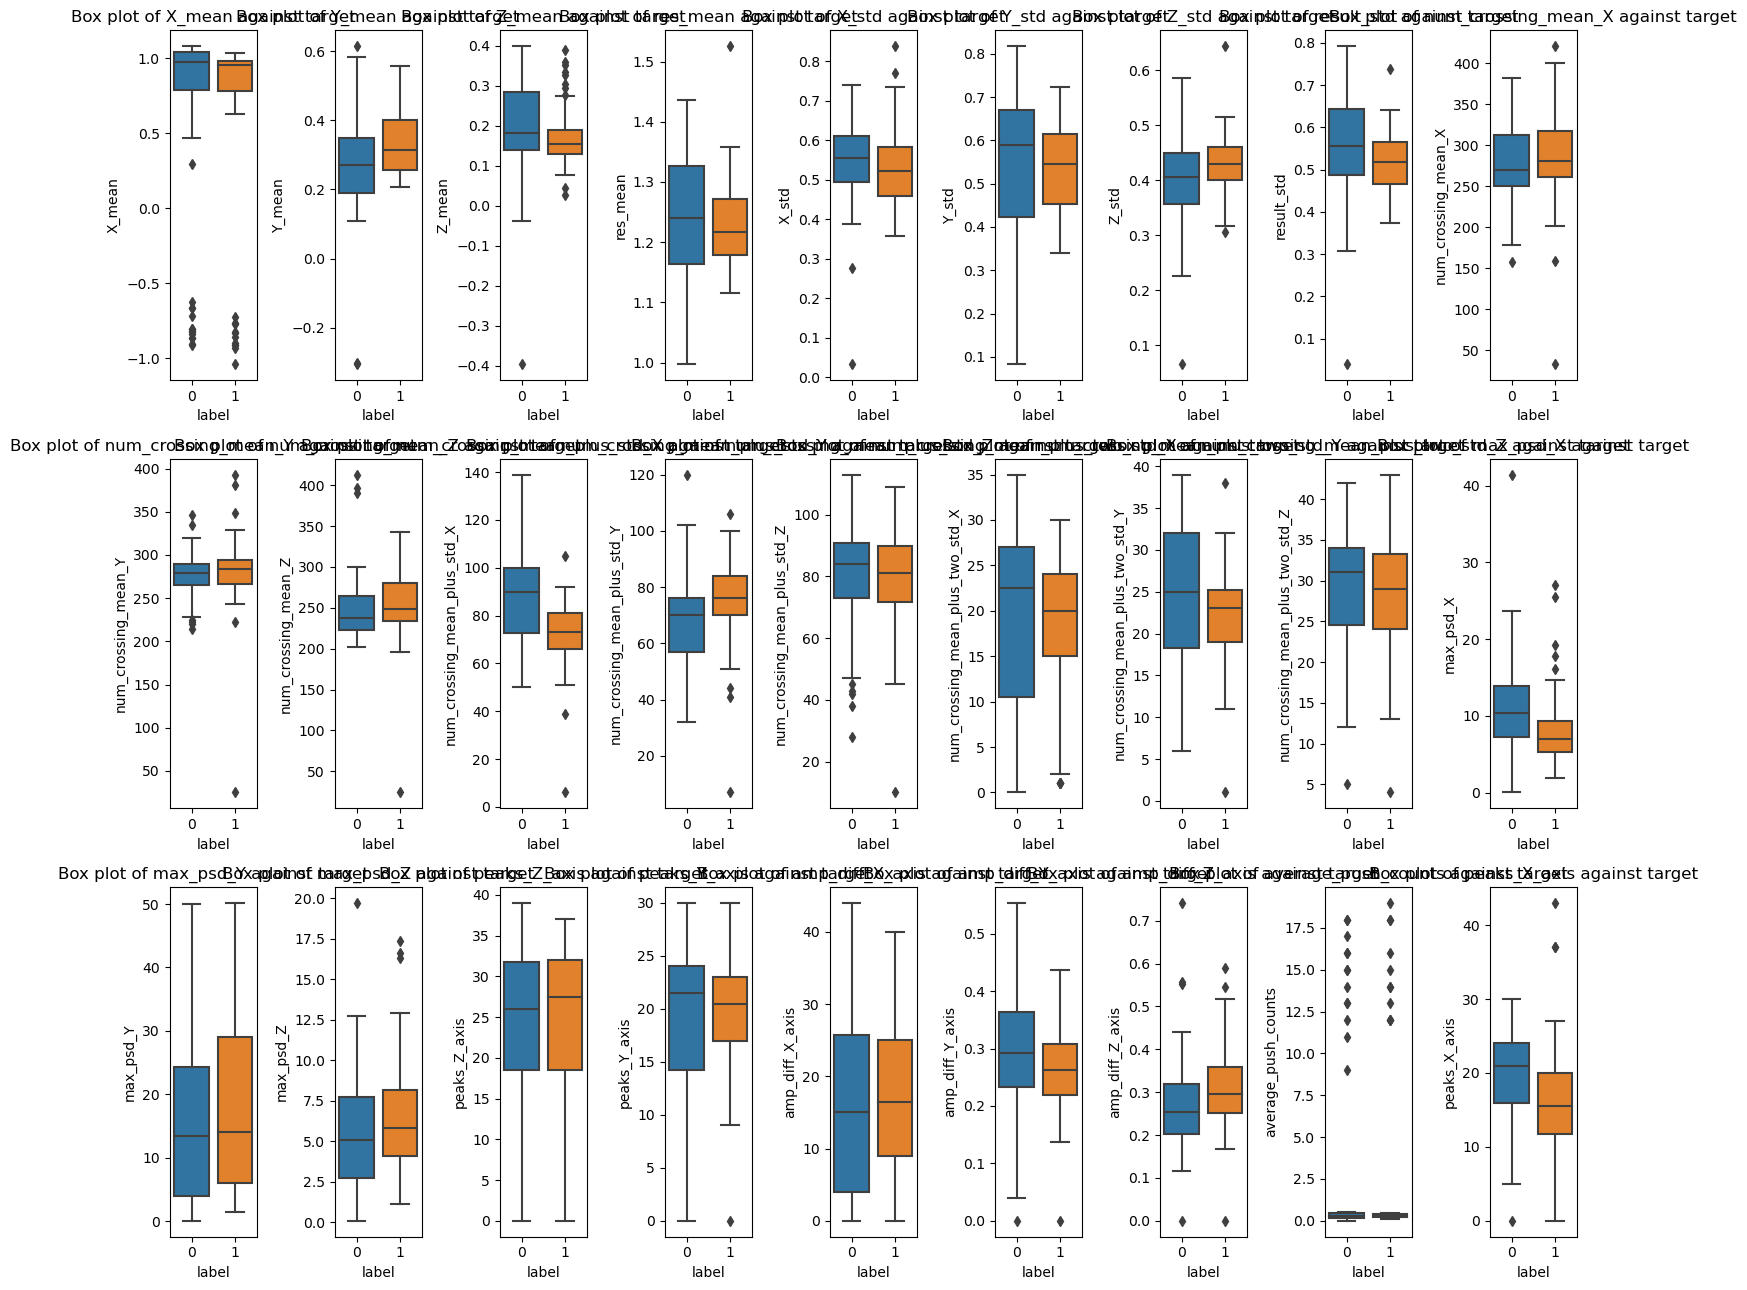

In [41]:
# Number of rows and columns for the subplot grid
num_rows = 3
num_cols = 9

# Create box plots for each feature against the target in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 13))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Iterate through features and create box plots
for i, feature in enumerate(X):
    # Select the current subplot
    ax = axes[i]
    
    # Create box plot
    sns.boxplot(x=df['label'], y=feature, data=df, ax=ax)
    
    # Set title
    ax.set_title(f'Box plot of {feature} against target')
    
# Adjust layout
plt.tight_layout()
plt.show()

#### d. Plot  scatterplots w.r.t target

In [ ]:
sns.scatterplot(x='Peaks > 1.6', y='num_crossing_mean_Z', hue='label', data=df)
plt.show()

#### e. Plot histograms w.r.t target

In [ ]:
fig, axis = plt.subplots(1, 2, figsize=(7,3))
plt.subplot(121)
#create histogram for each column in DataFrame
sns.histplot(data=df, x='num_crossing_mean_plus_std_X',bins=30,kde=True,color='g')
plt.subplot(122)
#create histogram for each column in DataFrame
sns.histplot(data=df, x='num_crossing_mean_plus_std_Y',bins=30,kde=True,hue='label')
plt.show()

#### f. Perform Shapiro-Wilk test
#### **If p value is < 0.05, sample does not come from a normal distribution i.e. we reject the null hypothesis**
#### **If p value is > 0.05, no evidence that sample does not come from a normal distributio i.e. we fail to reject the null hypothesis**




In [42]:
x=shapiro(X)

print(f"Shapiro-Wilk test:{x}")

Shapiro-Wilk test:ShapiroResult(statistic=0.5803183317184448, pvalue=0.0)


### Pipeline
1. The given dataset does not follow a normal distribution.
2. So Normalize or use MinMax scaler the dataset so that each value falls between 0 and 1. 
3. If the datset follows normal distribution, use Standardization. 
   StandardScaler rescales dataset to have a mean of 0 and a standard deviation of 1.

In [43]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns

numeric_transformer = MinMaxScaler()

preprocessor = ColumnTransformer(
    [
        ("MinMaxScaler", numeric_transformer, num_features),        
    ]
)

### Split the data into training data and testing data

In [44]:
X_train, X_test, Y_train, Y_test =train_test_split(X,y,test_size=0.30,random_state=42)

In [45]:
# summarize the dataset
Y_train=np.ravel(Y_train)
y=np.ravel(y)
print(X_train.shape, Y_train.shape)

(88, 27) (88,)


### Feature selection algorithm: Least absolute shrinkage and selection operator

In [46]:
lasso_model = Lasso(alpha=1)  
lasso_model.fit(X_train, Y_train)

Lasso(alpha=1)

In [47]:
y_pred = lasso_model.predict(X_test)

In [48]:
feature_coefficients = lasso_model.coef_

In [50]:
feature_names=['X_mean', 'Y_mean', 'Z_mean', 'res_mean', 'X_std', 'Y_std', 'Z_std',
       'result_std', 'num_crossing_mean_X', 'num_crossing_mean_Y',
       'num_crossing_mean_Z', 'num_crossing_mean_plus_std_X',
       'num_crossing_mean_plus_std_Y', 'num_crossing_mean_plus_std_Z',
       'num_crossing_mean_plus_two_std_X', 'num_crossing_mean_plus_two_std_Y',
       'num_crossing_mean_plus_two_std_Z', 'max_psd_X', 'max_psd_Y',
       'max_psd_Z', 'peaks_Z_axis', 'peaks_Y_axis', 'amp_diff_X_axis',
       'amp_diff_Y_axis', 'amp_diff_Z_axis', 'average_push_counts',
       'peaks_X_axis']

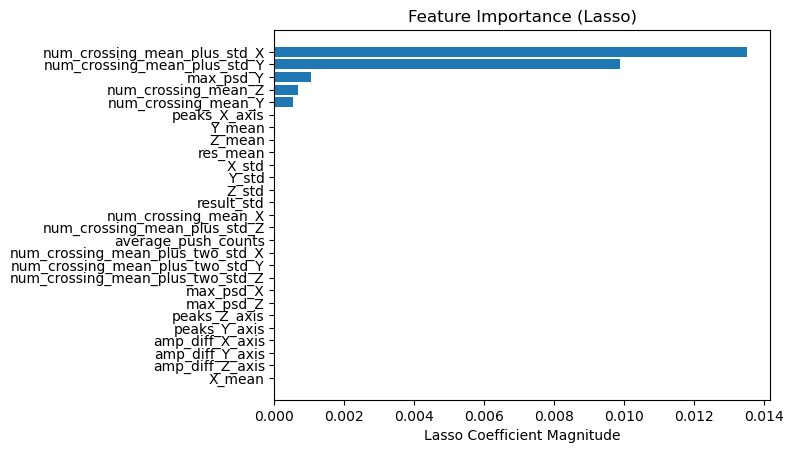

In [51]:
feature_importance = np.abs(lasso_model.coef_)
feature_names = X.columns
sorted_idx = np.argsort(feature_importance)

plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx])
plt.yticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx])
plt.xlabel('Lasso Coefficient Magnitude')
plt.title('Feature Importance (Lasso)')
plt.show()

In [52]:
# Print the most important variables
num_top_features = 5  # You can adjust this based on your preference
top_features = feature_names[sorted_idx][-num_top_features:]
print(f"Most important {num_top_features} variables: {top_features}")

Most important 5 variables: Index(['num_crossing_mean_Y', 'num_crossing_mean_Z', 'max_psd_Y',
       'num_crossing_mean_plus_std_Y', 'num_crossing_mean_plus_std_X'],
      dtype='object')


#### Define train and test dataset based on best features selected

In [53]:
y=df[['label']]
X=df[['num_crossing_mean_Y', 'num_crossing_mean_Z', 'max_psd_Y',
       'num_crossing_mean_plus_std_Y', 'num_crossing_mean_plus_std_X']]

In [54]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.20,random_state=142)

In [55]:
# summarize the dataset
y_train=np.ravel(y_train)
y=np.ravel(y)
print(X_train.shape, y_train.shape)

(100, 5) (100,)


### Model fit and evaluation
1. Function evaluate_model uses various metrics to determine the model efficiency.
2. Different models are trained and tested. Model with high accuracy or lowest mse is selected

In [56]:
def evaluate_model_classification(true, predicted):
    accuracy=accuracy_score(true, predicted)
    F1_score=f1_score(true, predicted)
    Confusion_matrix=confusion_matrix(true, predicted)
    report=classification_report(true, predicted)
    return accuracy, F1_score, report

In [57]:
#Use these evaluation metrics for classification
models = {
    "Logistic Regression":LogisticRegression(),
    "Linear Discriminant Analysis" :LinearDiscriminantAnalysis(),
    "K-Neighbors Classifer": KNeighborsClassifier(n_neighbors=2),
    "Support_vector Machine": svm.SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest Classifer":  RandomForestClassifier(), 
    
}
model_list = []
F1_list =[]
accuracy_list=[]


for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_accuracy,model_train_F1_score,model_train_report = evaluate_model_classification(y_train, y_train_pred)

    model_test_accuracy,model_test_F1_score,model_test_report= evaluate_model_classification(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Accuracy: {:.4f}".format(model_train_accuracy))
    print("- F1 Score: {:.4f}".format(model_train_F1_score))
    print("".format(print(model_train_report)))
    

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Accuracy: {:.4f}".format(model_test_accuracy))
    print("- F1 Score: {:.4f}".format(model_test_F1_score))
    print("".format(print(model_test_report)))
    
    F1_list.append(model_test_F1_score)
    accuracy_list.append(model_test_accuracy)
    
    
    print('='*35)
    print('\n')

Logistic Regression
Model performance for Training set
- Accuracy: 0.8400
- F1 Score: 0.8491
              precision    recall  f1-score   support

           0       0.87      0.80      0.83        49
           1       0.82      0.88      0.85        51

    accuracy                           0.84       100
   macro avg       0.84      0.84      0.84       100
weighted avg       0.84      0.84      0.84       100


----------------------------------
Model performance for Test set
- Accuracy: 0.7692
- F1 Score: 0.7692
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.77      0.77      0.77        13

    accuracy                           0.77        26
   macro avg       0.77      0.77      0.77        26
weighted avg       0.77      0.77      0.77        26




Linear Discriminant Analysis
Model performance for Training set
- Accuracy: 0.8200
- F1 Score: 0.8333
              precision    recall  f1-score

In [58]:
pd.DataFrame(list(zip(model_list, accuracy_list,F1_list)), columns=['Model Name', 'Accuracy','F1_Score']).sort_values(by=["Accuracy"],ascending=False)

,Model Name,Accuracy,F1_Score
4,Decision Tree,0.807692,0.814815
0,Logistic Regression,0.769231,0.769231
3,Support_vector Machine,0.730769,0.758621
5,Random Forest Classifer,0.730769,0.720000
1,Linear Discriminant Analysis,0.692308,0.714286
2,K-Neighbors Classifer,0.692308,0.636364


In [ ]:
###  Select the best model 
1. Train the selected model and get metric values
2. If the metric values are as per expectation, get hyperparameters.
3. Save the trained model

In [60]:
model=DecisionTreeClassifier()

In [61]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [62]:
y_pred=model.predict(X_test)

In [63]:
accuracy=accuracy_score(y_test,y_pred)
print('Accuracy :',accuracy)
f1score=f1_score(y_test,y_pred)
print('F1_score :',f1score)
mse=mean_squared_error(y_test,y_pred)
print('Mean_squared_error :',mse)

Accuracy : 0.8076923076923077
F1_score : 0.8148148148148148
Mean_squared_error : 0.19230769230769232


In [64]:
matrix = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80        13
           1       0.79      0.85      0.81        13

    accuracy                           0.81        26
   macro avg       0.81      0.81      0.81        26
weighted avg       0.81      0.81      0.81        26



Text(50.722222222222214, 0.5, 'True')

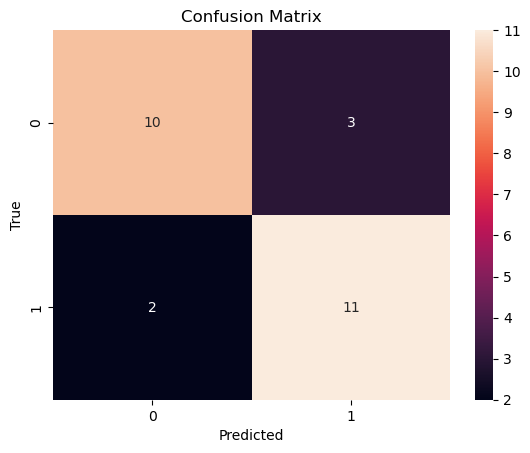

In [65]:
matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

In [66]:
#Cross validation
k = 11  # You can adjust this value based on your needs

# Create a KFold cross-validation object
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Perform k-fold cross-validation and specify the scoring metric (e.g., accuracy)
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print the cross-validation scores and their mean
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())

Cross-validation scores: [0.91666667 0.91666667 0.66666667 0.5        0.66666667 0.72727273
 0.72727273 0.63636364 0.81818182 0.63636364 0.63636364]
Mean CV accuracy: 0.7134986225895318


In [67]:
# Get hyperparameter values
hyperparameters = model.get_params()
print("Hyperparameters:", hyperparameters)

Hyperparameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}


In [ ]:
### Download the model

In [76]:
# Save the trained model to a file
joblib.dump(model, 'trained_model.joblib')

['trained_model.joblib']

In [77]:
# Save hyperparameters to a file (can use a dictionary)
hyperparameters={'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
joblib.dump(hyperparameters, 'hyperparameters.joblib')

['hyperparameters.joblib']

In [78]:
# Load the trained model
loaded_model = joblib.load('trained_model.joblib')

# Load hyperparameters
loaded_hyperparameters = joblib.load('hyperparameters.joblib')

In [ ]:
### Validate the saved model 
1. Use the saved model to predict the values on test data of different sizes

In [79]:
predictions=loaded_model.predict(X_test)

In [80]:
accuracy=accuracy_score(y_test,predictions)
print('Accuracy :',accuracy)
f1score=f1_score(y_test,predictions)
print('F1_score :',f1score)
mse=mean_squared_error(y_test,predictions)
print('Mean_squared_error :',mse)

Accuracy : 0.8076923076923077
F1_score : 0.8148148148148148
Mean_squared_error : 0.19230769230769232
